# 【《白话机器学习的数学》笔记2】分类

> 分类的问题，这里会先介绍利用简单的感知机进行线性可分的分类，然后再学习利用逻辑回归解决线性和非线性分类的问题

## 感知机
这里提到的感知机只是最简单的单层感知机，但可以先暂且不讨论什么叫感知机。先明确下我们要做的事情是什么？现在有不同尺寸的图像，希望能够判断出图像是横向还是纵向的。先准备下面这样的数据：

| 宽   | 高   | 形状 |
| ---- | ---- | ---- |
|  80  |  150 | 纵向 |
|  60  |  110 | 纵向 |
|  35  |  130 | 纵向 |
|  160 |  50  | 横向 |
|  160 |  20  | 横向 |
|  125 |  30  | 横向 |

可以根据数据把图像绘制出来,这里纵向用1表示，横向用-1表示。

In [2]:
import matplotlib.pyplot as plt

In [12]:
# 初始化数据
data = [(80,150,1),(60,110,1),(35,130,1),(160,50,-1),(160,20,-1),(125,30,-1)]
x = [item[:2] for item in data]
y = [item[2] for item in data]
x,y

([(80, 150), (60, 110), (35, 130), (160, 50), (160, 20), (125, 30)],
 [1, 1, 1, -1, -1, -1])

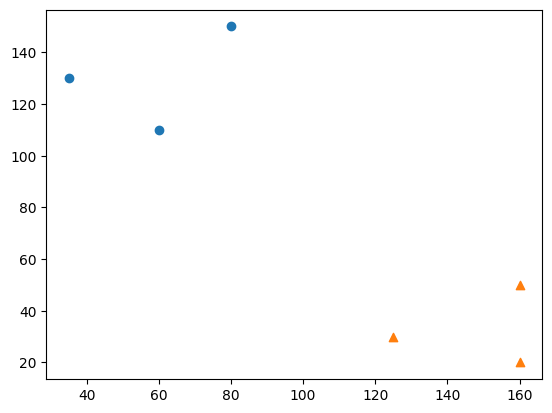

In [14]:
# 拆分样本点
x_1 = [item[:2] for item in data if item[2]==1]
x_2 = [item[:2] for item in data if item[2]==-1]
# 绘制散点图
plt.scatter([t[0] for t in x_1],[t[1] for t in x_1],marker='o')
plt.scatter([t[0] for t in x_2],[t[1] for t in x_2],marker='^')

plt.show()

可以看到我们完全可以通过一条线将平面划分为两块区域，两侧是不同的类别。那么，要怎么让计算机去找这样的一条线呢？

这里就需要使用到向量的概念(向量有方向有大小)，现在与其说是去找一条线还不如说是去找这条线的法向向量，可以看下下面这张图。
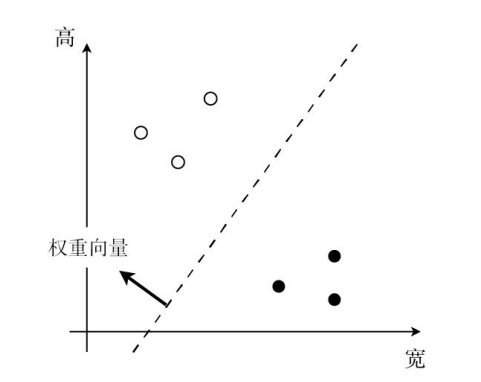
我们要找的就是其中的**权重向量**，就是要找的划分的直线的法向向量，不用在意名称。至于为什么是找这个向量呢？这里就需要知道向量的内积：
$$
a\cdot b = |a||b|cos<a,b>
$$
向量内积的正负在于这个余弦，由cosx的图像知道在0到360度内，90到270度是负的，其他的是正的，基于此，按照与权重向量的内积的正负关系，可以把平面划分为两块区域，可以看下面这种图片。
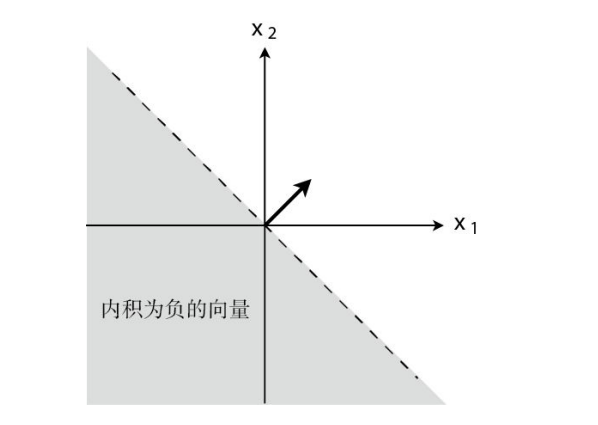
所有现在要做的就是让应该在内积为负的一侧的样本就在内积为负的一侧，应该为正的就在正的这一侧，也就是要找到合适的权重向量，利用向量的加减运算可以实现向量的旋转，也就实现了划分的那条直线的旋转。

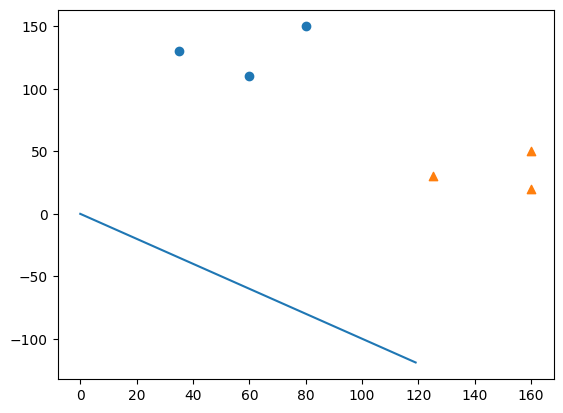

In [20]:
# 初始化权值向量
w = [1,1]
# 绘制图像
w_x = [i for i in range(120)]
w_y = [-w[0]/w[1]*k for k in w_x]

plt.scatter([t[0] for t in x_1],[t[1] for t in x_1],marker='o')
plt.scatter([t[0] for t in x_2],[t[1] for t in x_2],marker='^')

plt.plot(w_x,w_y)

plt.show()

可以看到现在并没有能够很好地进行划分，因此需要更新权重，更新的方法如下：
$$
w = \left\{\begin{matrix}
w+y^{(i)}\cdot x^{(i)} \quad w\cdot x^{(i)}!=y^{(i)}
 \\
w \qquad \qquad w\cdot x^{(i)}=y^{(i)}
\end{matrix}\right.
$$
当分类正确的话，就不需要改变权重，当分类错误，就需要调整权重。

补充：由于这里的y只有1和-1，但是内积会有各种数值，因此需要一个判别函数，让内积大于0就为1，小于0就为-1。
$$
y_{pred} = \left\{\begin{matrix}
 1\quad w\cdot x\ge 0 
 \\
-1\quad w\cdot x<0
\end{matrix}\right.
$$

In [24]:
x,y,w

([(80, 150), (60, 110), (35, 130), (160, 50), (160, 20), (125, 30)],
 [1, 1, 1, -1, -1, -1],
 [1, 1])

In [22]:
# 定义判别函数
def getjudge(x):
    if(x>=0):
        return 1
    return -1

顺便扯一下哈，要是用numpy的话，利用广播和向量运算会更加简单，但这里先尝试不依赖这些计算库来完成！

In [30]:
[x[0][i]*w[i] for i in range(2)]

[80, 150]

In [163]:
# 引入display，用于清除notebook的输出，实现图像刷新
from IPython import display 
# 图像绘制
def weight_draw(w,x_1,x_2):
    display.clear_output(wait=True)
    
#     plt.xlim(-50,150)
#     plt.ylim(-150,200)
    if(w[1]!=0):
        plt.plot([i for i in range(210)],[-w[0]/w[1]*i for i in range(210)])

    plt.scatter([t[0] for t in x_1],[t[1] for t in x_1],marker='o')
    plt.scatter([t[0] for t in x_2],[t[1] for t in x_2],marker='^')
    
    plt.title(f"w:{w}")
    
    plt.show()
    plt.pause(1)

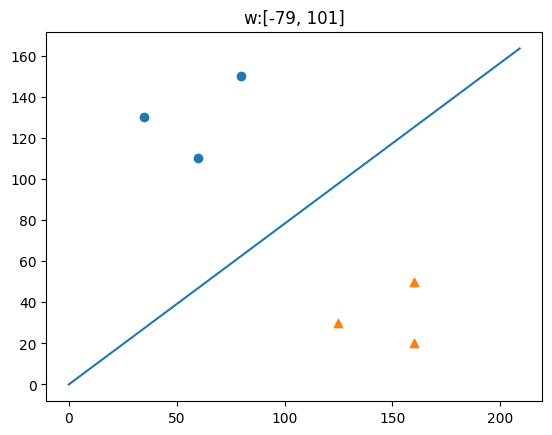

In [155]:
# 重新设置权重
w = [1,1]
# 迭代次数
n = 20
# 初始化图像
weight_draw(w,x_1,x_2)
# 更新权重
for i in range(n):
    for j in range(len(x)):
#         print(1)
        # 计算内积
        tmp = sum([x[j][k]*w[k] for k in range(len(w))])
        # 判别函数
        pred_y = getjudge(tmp)
        if(pred_y!=y[j]):
            w = [w[k]+y[j]*x[j][k] for k in range(len(w))]
            
            weight_draw(w,x_1,x_2)

突然发现一个点，就是现在这样确定的直线，都是过原点的，因为在权重向量中默认从(0,0)开始到w的这个坐标点的向量为权重向量了，其实也就是没有去设置偏置值，这里可以换一些样本点看一下。

In [152]:
x_new = [(0,0),(0,1),(1,0),(1,1)]
y_new = [1,1,1,-1]
x_1_new = [x_new[i] for i in range(len(y_new)) if y_new[i]==1]
x_2_new = [x_new[i] for i in range(len(y_new)) if y_new[i]==-1]
x_1_new,x_2_new

([(0, 0), (0, 1), (1, 0)], [(1, 1)])

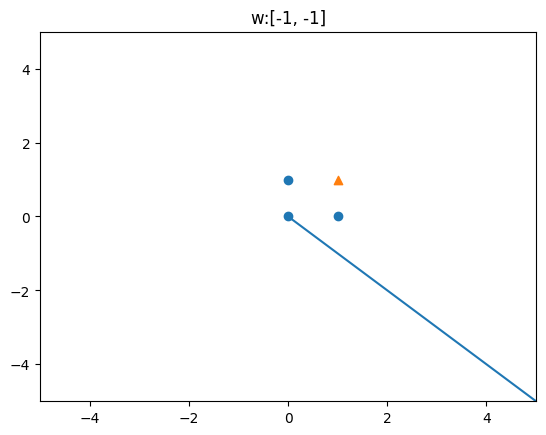

In [165]:
# 重新设置权重
w = [1,1]
# 迭代次数
n = 10
# 初始化图像
weight_draw(w,x_1_new,x_2_new)
# 更新权重
for i in range(n):
    for j in range(len(x_new)):
#         print(1)
        # 计算内积
        tmp = sum([x_new[j][k]*w[k] for k in range(len(w))])
        # 判别函数
        pred_y = getjudge(tmp)
        if(pred_y!=y_new[j]):
            w = [w[k]+y_new[j]*x_new[j][k] for k in range(len(w))]
            
            weight_draw(w,x_1_new,x_2_new)

可以看到这样根本就划分不了，即使是这样线性可分的也不行，就本来就只能用于线性可分，现在这样连线性可分的都不行，就着实拉跨，但可能因为这本书上介绍的都是入门级的内容，所以也没提怎么去引入偏置值，然后更新偏置值。

查了下网上的资料，发现和之前回归是类似的，只要能够确定好目标函数，或者说定好损失函数，就能够用梯度下降法更新参数，然后找到最小值。所以就是在于目标函数的选取上，前面所用到的知识点是充分运用了向量的加减可以改变向量的方向，来实现的划分，并没有用到微分求极值的概念。
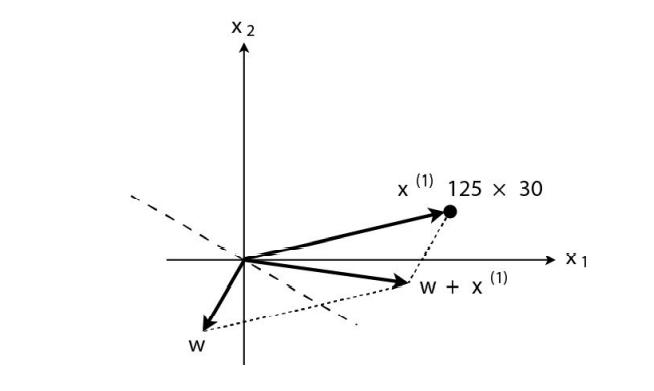 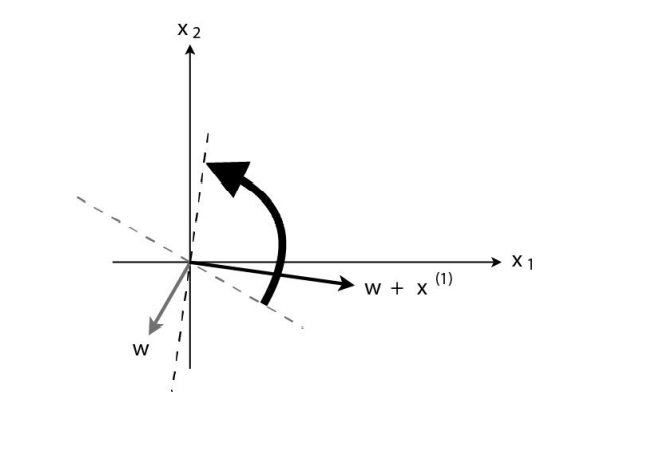

In [167]:
x_1_new,x_2_new

([(0, 0), (0, 1), (1, 0)], [(1, 1)])

## 加入偏置值的单层感知机
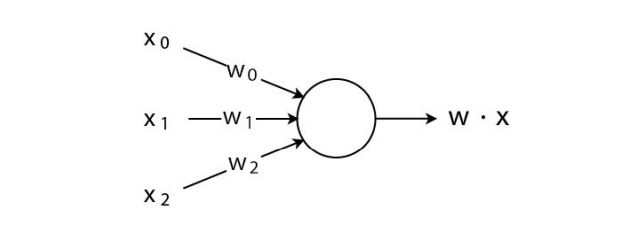

In [168]:
import numpy as np

In [202]:
# 初始化数据
data = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,-1]])
x = data[:,:-1]
y = data[:,2:]
x,y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[ 1],
        [ 1],
        [ 1],
        [-1]]))

In [223]:
np.where(y==1)

(array([0, 1, 2], dtype=int64), array([0, 0, 0], dtype=int64))

In [171]:
# 判别函数
def judge_function(x):
    if(x>=0):
        return 1
    return -1

In [236]:
from IPython import display
# 图像绘制
def drawing(w,b,x):
    display.clear_output(wait=True)
    
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    
    plt.scatter(x[:3,0],x[:3,1])
    plt.scatter(x[3:,0],x[3:,1])
    
    plt.plot([i for i in range(-6,6)],[-(w[0]*i+b)/w[1] for i in range(-6,6)])
    
    plt.title(f"w:{w} b:{b}")
    
    plt.show()
    plt.pause(1)

这里我一开始都没弄懂要怎么画这条划分的直线，被自己蠢哭了。其实就是$w^{T}x+b=0$这条直线，可以从我们的判别函数中看，$w^{T}+b$>0是一类，小于0是另外一类。所以，从图像上来看，大于0的就是在这条直线上方，小于0的就是在这条直线下方。

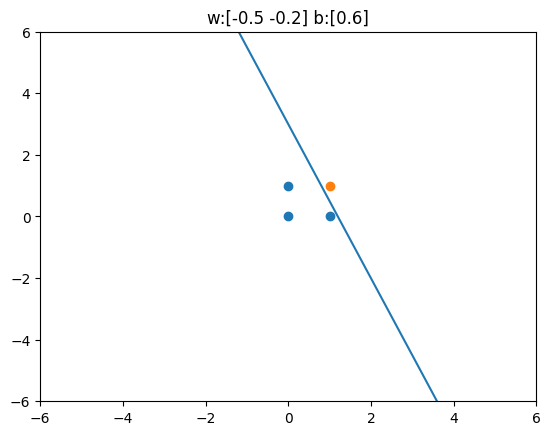

In [244]:
# 设置权重
w = np.array([1,1])
# 设置偏置值
b = 0
# 设置迭代次数
n = 15
# 学习率
lr = 0.3
# 绘制图像
drawing(w,b,x)
for i in range(n):
    for j in range(len(y)):
        if(judge_function(sum(w*x[j])+b)!=y[j]):
            w = w+lr*y[j]*x[j]
            b = b+lr*y[j]
#             print(f"w:{w} b:{b}")
            # 更新图像
            drawing(w,b,x)

In [245]:
w,b

(array([-0.5, -0.2]), array([0.6]))

In [248]:
judge_function(sum(x[3]*w)+b)

-1

## 逻辑回归

前面介绍的感知机分类只能够对线性可分的数据进行分类，如果遇到线性不可分的问题的时候，则可以使用逻辑回归的方法来进行实现，这里先利用逻辑回归解决线性可分的情况，之后再解决线性不可分的情况。

### 逻辑回归之线性可分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 初始化数据
data = np.array([[80,150,1],[60,110,1],[35,130,1],[160,50,0],[160,20,0],[125,30,0]])

这里把标签为-1的样本换成为0的，因为接下来会使用到概率的概念，可以把为1当作是肯定是正样本，把为0当作是肯定是负样本，这样会更方便理解。

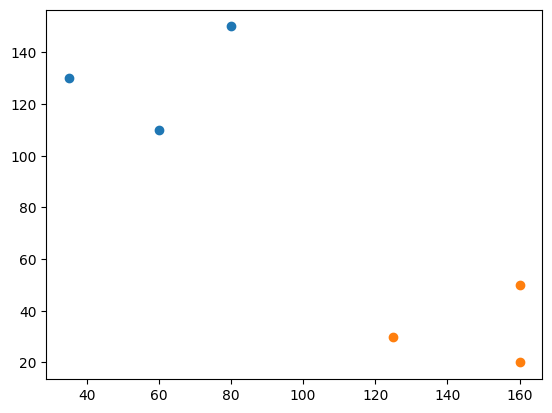

In [3]:
# 绘制图像
class_1 = data[data[:,2]==1]
class_2 = data[data[:,2]==0]

plt.scatter(class_1[:,0],class_1[:,1])
plt.scatter(class_2[:,0],class_2[:,1])

plt.show()

在逻辑回归中，和前面回归以及感知机的重大区别就在于使用到了sigmoid函数，sigmoid函数有两个显著的特点：

1.数值范围在0-1之间，能够对概率进行表示；2.sigmoid是平滑的非线性变化。

sigmoid函数：$f(x) = \frac{1}{1+e^{(-x)}}$

我们所做的就是将$w^{T}x+b$代入sigmoid函数中，即$f(w^{T}x+b) = \frac{1}{1+e^{(w^{T}x+b)}}$

所以通过sigmoid函数，能够将我们原来的表达式的值都转化到0到1之间，接下来就可以用条件概率来表示分类的情况：
$$
P(y^{(i)}=1|x^{(i)})
$$
上面的式子表示当样本点为x的条件下，属于y=1这一类的概率是多少。同样的还有$P(y^{(i)}=-1|x^{(i)})$，我们要做的就是使这些条件概率尽可能地大。想要让概率尽可能地大，那么可以使用到概率论中学到的**最大似然估计**:
$$
L(\theta) = \prod P(y=1|x_{i})^{y_{i}}P(y=0|x_{i})^{(1-y_{i})}
$$
在概率论中，要去求这个参数\theta 通常都会对它取ln，然后再求导，因为取ln后乘积就可以变为加法，使求导更加简单，这里也是一样的，对$L(\theta)$取对数有
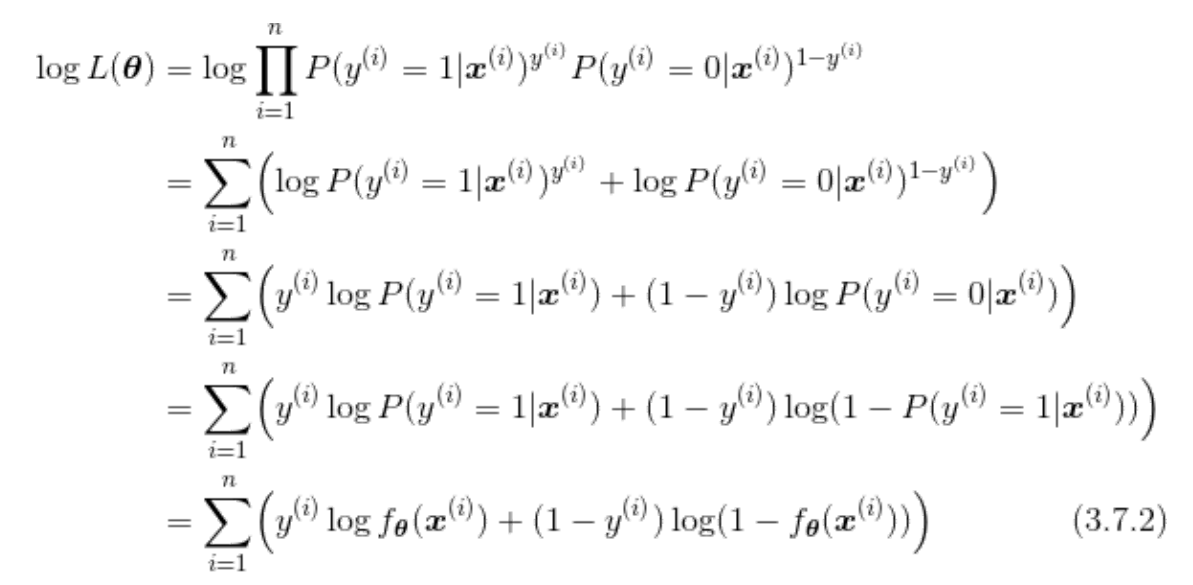
这里让sigmoid函数转化后的概率表示的是$P(y^{(i)}=1|x^{(i)})$，即$f_{\theta}(x_{(i)}) = P(y^{(i)}=1|x^{(i)})$，又因为是二分类的问题，因此另一类的概率就是$1-f_{\theta}(x_{(i)})$

接下来就可以进行求导了，这里使用梯度下降法，依照复合函数求导法则，先由$logL(\theta)$对$f_{\theta}(x)$求导，然后再由$f_{\theta}(x)$对$x$求导(**注意其实是对sigmoid函数求导，这里的x不是样本点那个x！**),最后是$w^{T}x+b$对w求导。

**<font color="red">这里w和$\theta$的意思是一样的，书里写的是$\theta$，这里习惯性地写了w😭</font>**

1. $logL(\theta)$对$f_{\theta}(x)$求导
$$
\sum (y^{(i)}\cdot \frac{1}{f_{\theta}(x^{(i)})}-(1-y^{(i)})\cdot \frac{1}{1-f_{\theta}(x^{(i)})})
$$

2. $f_{\theta}(x)$对$x$求导(其实就是对sigmoid函数求导)

sigmoid函数求导:
$$
\frac{df(x)}{dx} = f(x)(1-f(x))
$$

3. $w^{T}x+b$对w求导
$$
w^{T}x+b = (w_{n}x_{n}+...+w_{2}x_{2}+w_{1}x_{1}+b)
对w求导:
x_{i}
对b求导:
1
$$

把这三部分乘起来就是求导后结果了：
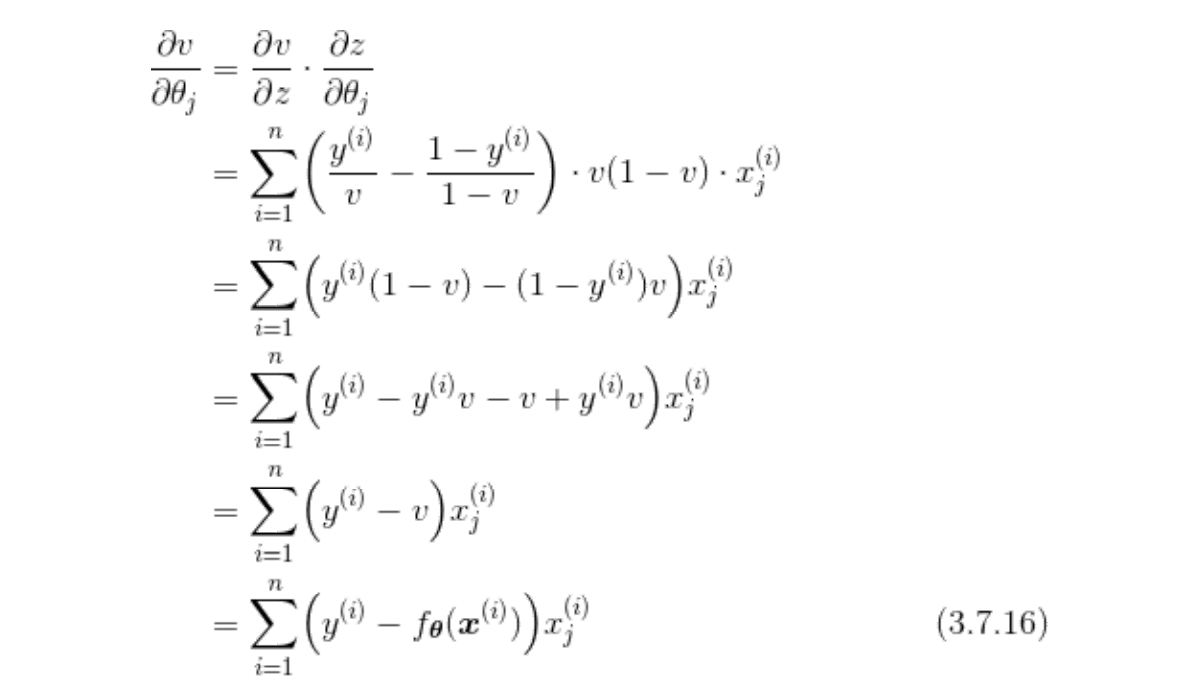

**PS：感觉自己这里说的不是很清楚，主要符号多了，可能容易混乱，推荐看这本书，真的超级好！**

最后，就可以得到参数的更新表达式：
$$
w = w+\eta \sum (y-f_{\theta}(x))x_{i}
$$
因为这里是要求最大值，所以是往和导数符号相同方向移动

In [14]:
data

array([[ 80, 150,   1],
       [ 60, 110,   1],
       [ 35, 130,   1],
       [160,  50,   0],
       [160,  20,   0],
       [125,  30,   0]])

In [17]:
data[1,2]

1

In [33]:
# 定义sigmoid函数
# 根据x是否大于0来选择运算，避免溢出
def sigmoid(x):
    if(x>=0):
        return 1/(1+np.exp(-x)) 
    return np.exp(x)/(1+np.exp(x))

In [34]:
sigmoid(2)

0.8807970779778823

In [42]:
def judge(x,theta):
    if(x>=theta):
        return 1
    return 0

In [43]:
-(np.arange(160)*2+3)/5

array([ -0.6,  -1. ,  -1.4,  -1.8,  -2.2,  -2.6,  -3. ,  -3.4,  -3.8,
        -4.2,  -4.6,  -5. ,  -5.4,  -5.8,  -6.2,  -6.6,  -7. ,  -7.4,
        -7.8,  -8.2,  -8.6,  -9. ,  -9.4,  -9.8, -10.2, -10.6, -11. ,
       -11.4, -11.8, -12.2, -12.6, -13. , -13.4, -13.8, -14.2, -14.6,
       -15. , -15.4, -15.8, -16.2, -16.6, -17. , -17.4, -17.8, -18.2,
       -18.6, -19. , -19.4, -19.8, -20.2, -20.6, -21. , -21.4, -21.8,
       -22.2, -22.6, -23. , -23.4, -23.8, -24.2, -24.6, -25. , -25.4,
       -25.8, -26.2, -26.6, -27. , -27.4, -27.8, -28.2, -28.6, -29. ,
       -29.4, -29.8, -30.2, -30.6, -31. , -31.4, -31.8, -32.2, -32.6,
       -33. , -33.4, -33.8, -34.2, -34.6, -35. , -35.4, -35.8, -36.2,
       -36.6, -37. , -37.4, -37.8, -38.2, -38.6, -39. , -39.4, -39.8,
       -40.2, -40.6, -41. , -41.4, -41.8, -42.2, -42.6, -43. , -43.4,
       -43.8, -44.2, -44.6, -45. , -45.4, -45.8, -46.2, -46.6, -47. ,
       -47.4, -47.8, -48.2, -48.6, -49. , -49.4, -49.8, -50.2, -50.6,
       -51. , -51.4,

In [44]:
from IPython import display

def drawing(w,b,data):
    display.clear_output(wait=True)
    
    plt.plot(np.arange(160),-(w[0]*np.arange(160)+b)/w[1])
    
    class_1 = data[data[:,2]==1]
    class_2 = data[data[:,2]==0]
    plt.scatter(class_1[:,0],class_1[:,1])
    plt.scatter(class_2[:,0],class_2[:,1])
    
    plt.title(f"w:{w} b:{b}")
    plt.show()
    plt.pause(0.6)

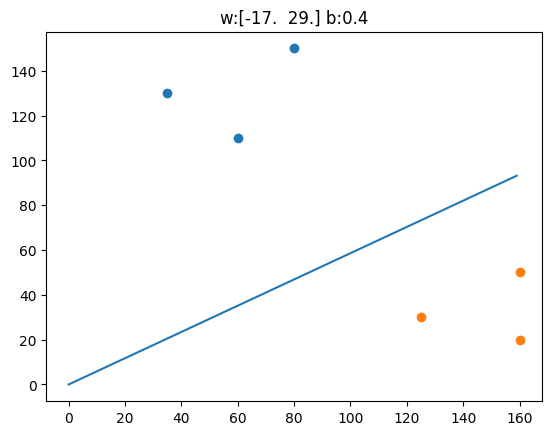

In [51]:
# 初始化权重和偏置值
w = np.array([10,0])
b = 0.1
# 设置迭代次数
n = 10
# 设置学习率
lr = 0.1
# 设置阈值
theta = 0.5
# 训练模型
for i in range(n):
    
    #法1
    w = w+lr*sum([(data[j,2]-judge(sigmoid(sum(w*data[j,:2])+b),theta))*data[j,:2] for j in range(len(data))])
    b = b+lr*sum([(data[j,2]-judge(sigmoid(sum(w*data[j,:2])+b),theta)) for j in range(len(data))])
    
    #法2
#     for j in range(len(data)):
#         pred_y = sum(w*data[j,:2])+b
#         pred_y = sigmoid(pred_y)
#         pred_y = judge(pred_y,theta)
#         w = w+lr*(data[j,2]-pred_y)*data[j,:2]
#         b = b+lr*(data[j,2]-pred_y)
#     print(f"w:{w} b:{b}")
    drawing(w,b,data)

貌似数据太简单了，随便训练一下就分好了

In [49]:
a = np.array([[2,3],[4,5]])
sum(a)

array([6, 8])

### 逻辑回归之线性不可分

In [298]:
# 不要问为什么每次都要导入，这样就不用往上翻了
import matplotlib.pyplot as plt
import numpy as np

In [299]:
# 初始化数据
data = np.array([[72,59,1],[35,58,1],[48,57,1],[100,60,1],[136,60,1],[165,60,1],
                 [120,57,0],[135,56,0],[125,58,0],[136,58,0],[115,57,0],[123,56,0]])
class_1 = data[data[:,2]==1]
class_2 = data[data[:,2]==0]
class_1,class_2

(array([[ 72,  59,   1],
        [ 35,  58,   1],
        [ 48,  57,   1],
        [100,  60,   1],
        [136,  60,   1],
        [165,  60,   1]]),
 array([[120,  57,   0],
        [135,  56,   0],
        [125,  58,   0],
        [136,  58,   0],
        [115,  57,   0],
        [123,  56,   0]]))

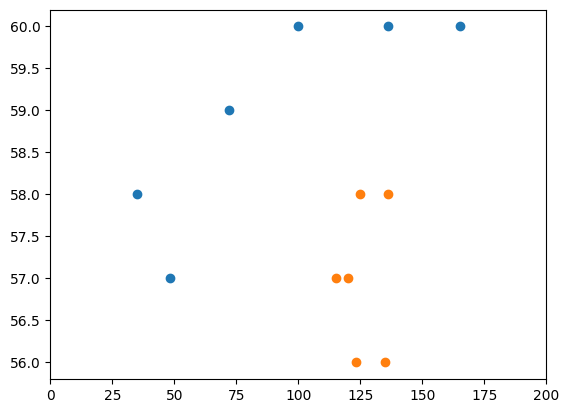

In [300]:
plt.scatter(class_1[:,0],class_1[:,1])
plt.scatter(class_2[:,0],class_2[:,1])

plt.xlim(0,200)

plt.show()

有了前面的基础后，其实线性不可分只是表达式有一点点变化，可以对比一下：

1. 线性情况
$$
w^{T}x+b = w1*x1+w2*x2+b
$$

2. 非线性情况
$$
w^{T}x+b = w1*x1+w2*x2+w3*x1^{2}+b
$$

可以看到和回归一样，由之前的一次表达式，改为了高次表达式，除了上面这样的高次表达式，还可以写更多，包括3次、4次之类的，接下来写一下代码。

sigmoid函数和判别函数和之前一样，直接拿下来就好了

In [301]:
# 定义sigmoid函数
# 根据x是否大于0来选择运算，避免溢出
def sigmoid(x):
    if(x>=0):
        return 1/(1+np.exp(-x)) 
    return np.exp(x)/(1+np.exp(x))

# 判别函数
def judge(x,theta):
    if(x>=theta):
        return 1
    return 0

In [302]:
data

array([[ 72,  59,   1],
       [ 35,  58,   1],
       [ 48,  57,   1],
       [100,  60,   1],
       [136,  60,   1],
       [165,  60,   1],
       [120,  57,   0],
       [135,  56,   0],
       [125,  58,   0],
       [136,  58,   0],
       [115,  57,   0],
       [123,  56,   0]])

In [303]:
x = data[:,:2]
x[:,0]

array([ 72,  35,  48, 100, 136, 165, 120, 135, 125, 136, 115, 123])

In [304]:
# 增加x1的平方
tmp = x[:,0]**2
x = np.c_[x,tmp]
x[:,2]

array([ 5184,  1225,  2304, 10000, 18496, 27225, 14400, 18225, 15625,
       18496, 13225, 15129])

In [305]:
y = data[:,2]
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [306]:
from IPython import display

def drawing_unlinear(w,b,data):
    display.clear_output(wait=True)
    
    class_1 = data[data[:,2]==1]
    class_2 = data[data[:,2]==0]
    plt.scatter(class_1[:,0],class_1[:,1])
    plt.scatter(class_2[:,0],class_2[:,1])
    
    plt.plot(np.arange(96,160),-(w[0]*np.arange(96,160)+w[2]*np.arange(96,160)**2+b)/w[1])
    
    plt.title(f"w:{w} b:{b}")
    
    plt.show()
    plt.pause(0.3)

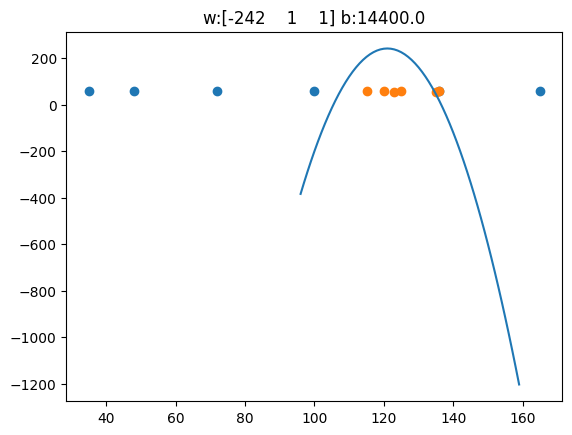

In [251]:
# 初始化权重和偏置值
w = np.array([-243,1,1])
b = 14400
# 设置学习率
lr = 0.0001
# 设置迭代次数
n = 10
# 训练模型
for i in range(n):
#     w = w+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[j] for j in range(len(data))])
#     w[0] = w[0]+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,0][j] for j in range(len(data))])
#     w[1] = w[1]+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,1][j] for j in range(len(data))])
#     w[2] = w[2]+0.001*lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,2][j] for j in range(len(data))])
#     b = b+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta)) for j in range(len(data))])

    j = np.random.randint(len(data))
    
    w[0] = w[0]+lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,0][j]
    w[1] = w[1]+lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,1][j]
    w[2] = w[2]+0.01*lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,2][j]
    b = b+1000*lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))
    
    drawing_unlinear(w,b,data)

In [307]:
x,y,w

(array([[   72,    59,  5184],
        [   35,    58,  1225],
        [   48,    57,  2304],
        [  100,    60, 10000],
        [  136,    60, 18496],
        [  165,    60, 27225],
        [  120,    57, 14400],
        [  135,    56, 18225],
        [  125,    58, 15625],
        [  136,    58, 18496],
        [  115,    57, 13225],
        [  123,    56, 15129]]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1]))

In [308]:
[judge(sigmoid(sum(w*k)+b),theta) for k in x]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [222]:
np.random.randint(10)

3

In [227]:
np.arange(20,180)

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179])

In [309]:
x

array([[   72,    59,  5184],
       [   35,    58,  1225],
       [   48,    57,  2304],
       [  100,    60, 10000],
       [  136,    60, 18496],
       [  165,    60, 27225],
       [  120,    57, 14400],
       [  135,    56, 18225],
       [  125,    58, 15625],
       [  136,    58, 18496],
       [  115,    57, 13225],
       [  123,    56, 15129]])

In [310]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [311]:
x = standardization(x)

In [312]:
class_1 = x[:6,:2]
class_2 = x[6:,:2]
class_1,class_2

(array([[-1.0015318 ,  0.70710678],
        [-1.99857242,  0.        ],
        [-1.64826085, -0.70710678],
        [-0.24701457,  1.41421356],
        [ 0.72307901,  1.41421356],
        [ 1.50454328,  1.41421356]]),
 array([[ 0.29192631, -0.70710678],
        [ 0.69613197, -1.41421356],
        [ 0.42666153,  0.        ],
        [ 0.72307901,  0.        ],
        [ 0.15719109, -0.70710678],
        [ 0.37276744, -1.41421356]]))

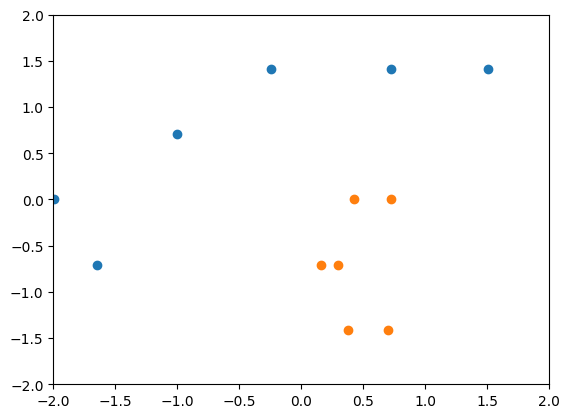

In [348]:
plt.scatter(class_1[:,0],class_1[:,1])
plt.scatter(class_2[:,0],class_2[:,1])

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()

In [314]:
data = np.c_[x,data[:,2]]
data

array([[-1.0015318 ,  0.70710678, -1.12328363,  1.        ],
       [-1.99857242,  0.        , -1.67159506,  1.        ],
       [-1.64826085, -0.70710678, -1.5221563 ,  1.        ],
       [-0.24701457,  1.41421356, -0.45627987,  1.        ],
       [ 0.72307901,  1.41421356,  0.72039452,  1.        ],
       [ 1.50454328,  1.41421356,  1.92933883,  1.        ],
       [ 0.29192631, -0.70710678,  0.15310894,  0.        ],
       [ 0.69613197, -1.41421356,  0.68286171,  0.        ],
       [ 0.42666153,  0.        ,  0.32276832,  0.        ],
       [ 0.72307901,  0.        ,  0.72039452,  0.        ],
       [ 0.15719109, -0.70710678, -0.00962557,  0.        ],
       [ 0.37276744, -1.41421356,  0.25407358,  0.        ]])

In [315]:
data,x,y

(array([[-1.0015318 ,  0.70710678, -1.12328363,  1.        ],
        [-1.99857242,  0.        , -1.67159506,  1.        ],
        [-1.64826085, -0.70710678, -1.5221563 ,  1.        ],
        [-0.24701457,  1.41421356, -0.45627987,  1.        ],
        [ 0.72307901,  1.41421356,  0.72039452,  1.        ],
        [ 1.50454328,  1.41421356,  1.92933883,  1.        ],
        [ 0.29192631, -0.70710678,  0.15310894,  0.        ],
        [ 0.69613197, -1.41421356,  0.68286171,  0.        ],
        [ 0.42666153,  0.        ,  0.32276832,  0.        ],
        [ 0.72307901,  0.        ,  0.72039452,  0.        ],
        [ 0.15719109, -0.70710678, -0.00962557,  0.        ],
        [ 0.37276744, -1.41421356,  0.25407358,  0.        ]]),
 array([[-1.0015318 ,  0.70710678, -1.12328363],
        [-1.99857242,  0.        , -1.67159506],
        [-1.64826085, -0.70710678, -1.5221563 ],
        [-0.24701457,  1.41421356, -0.45627987],
        [ 0.72307901,  1.41421356,  0.72039452],
        [

In [343]:
from IPython import display

def drawing_unlinear_new(w,b,data):
    display.clear_output(wait=True)
    
    class_1 = data[data[:,3]==1]
    class_2 = data[data[:,3]==0]
    plt.scatter(class_1[:,0],class_1[:,1])
    plt.scatter(class_2[:,0],class_2[:,1])
    
    plt.plot(np.arange(-2,2,0.1),-(w[0]*np.arange(-2,2,0.1)+w[2]*np.arange(-2,2,0.1)**2+b)/w[1])
    
    plt.title(f"w:{w} b:{b}")
    
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    
    plt.show()
    plt.pause(0.3)

In [344]:
data[data[:,3]==1]

array([[-1.0015318 ,  0.70710678, -1.12328363,  1.        ],
       [-1.99857242,  0.        , -1.67159506,  1.        ],
       [-1.64826085, -0.70710678, -1.5221563 ,  1.        ],
       [-0.24701457,  1.41421356, -0.45627987,  1.        ],
       [ 0.72307901,  1.41421356,  0.72039452,  1.        ],
       [ 1.50454328,  1.41421356,  1.92933883,  1.        ]])

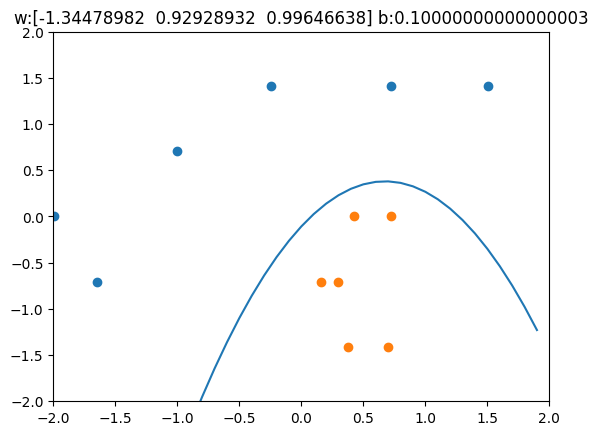

In [347]:
# 初始化权重和偏置值
# w = np.array([-0.3,1,0.2])
# b = 0.2
w = np.array([-0.5,1,1])
b = 0.5
# 设置学习率
lr = 0.1
# 设置迭代次数
n = 100
# 训练模型
for i in range(n):
#     w = w+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[j] for j in range(len(data))])
#     w[0] = w[0]+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,0][j] for j in range(len(data))])
#     w[1] = w[1]+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,1][j] for j in range(len(data))])
#     w[2] = w[2]+0.001*lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,2][j] for j in range(len(data))])
#     b = b+lr*sum([(y[j]-judge(sigmoid(sum(w*x[j])+b),theta)) for j in range(len(data))])

    j = np.random.randint(len(data))
    
    w[0] = w[0]+lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,0][j]
    w[1] = w[1]+lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,1][j]
    w[2] = w[2]+0.01*lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))*x[:,2][j]
    b = b+lr*(y[j]-judge(sigmoid(sum(w*x[j])+b),theta))
    
    drawing_unlinear_new(w,b,data)

调了这么久，非常直观的感受就是
1. 归一化后的要比未归一化的要好
2. 随机梯度下降要比梯度下降要好